## Import Libraries

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### import dataset

In [21]:
df = pd.read_csv('Iris.csv')

In [22]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [23]:
df.drop(['Id'],axis =1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [24]:
target = df['Species']
s = set()
for val in target:
    s.add(val)
    
s = list(s)
print(s)

['Iris-versicolor', 'Iris-virginica', 'Iris-setosa']


In [25]:
rows = list(range(100,150))
df = df.drop(df.index[rows])

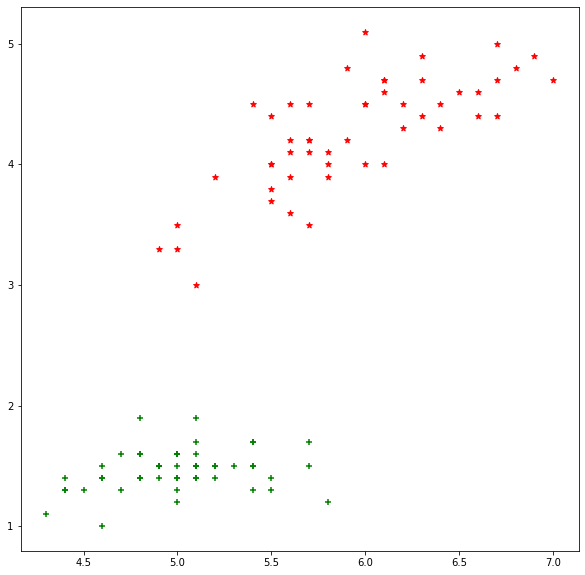

In [26]:
x = df['SepalLengthCm']
y = df['PetalLengthCm']

setosa_x = x[:50]
setosa_y = y[:50]

versicolor_x = x[50:] 
versicolor_y = y[50:]

plt.figure(figsize =(10,10))
plt.scatter(setosa_x, setosa_y, marker = '+', color ='green')
plt.scatter(versicolor_x, versicolor_y, marker = '*', color ='red')
plt.show()

In [27]:
from sklearn.utils  import shuffle
from sklearn.model_selection import train_test_split

In [28]:
df = df.drop(['SepalWidthCm','PetalWidthCm'],axis=1)

In [29]:
Y = []
target = df['Species']

for val in target:
    if (val == 'Iris-setosa'):
        Y.append(-1)
    else:
        Y.append(1)

df = df.drop(['Species'], axis =1)
X = df.values.tolist()

X,Y = shuffle(X,Y)

x_train = []
y_train = []
x_test = []
y_test = []

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.9)

x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

y_train = y_train.reshape(90,1)
y_test = y_test.reshape(10,1)

#### manual implementation

In [30]:
train_e = x_train[:, 0]
train_f = x_train[:, 1]

train_e = train_e.reshape(90,1)
train_f = train_f.reshape(90,1)

w1 = np.zeros((90,1))
w2 = np.zeros((90,1))

epochs = 1
alpha = 0.0001
while epochs < 10000:
    y = w1*train_e + train_f*w2
    prod = y*y_train
    count =0
    for val in prod:
        if val>=1:
            cost =0
            w1 = w1 - alpha*(2*1/epochs*w1)
            w2 = w2 - alpha*(2*1/epochs*w2)
        else:
            cost = 1-val
            w1 = w1+alpha*(train_e[count]*y_train[count] - 2*1/epochs*w1)
            w2 = w2+alpha*(train_f[count]*y_train[count] - 2*1/epochs*w2)
        count=count+1
    epochs = epochs +1

In [32]:
from sklearn.metrics import accuracy_score
index = list(range(10,90))
w1 = np.delete(w1, index)
w2 =  np.delete(w2, index)
w1 = w1.reshape(10,1)
w2 = w2.reshape(10,1)

test_e = x_test[:,0]
test_f = x_test[:,1]

test_e = test_e.reshape(10,1)
test_f = test_f.reshape(10,1)
y_pred =  w1*test_e + w2*test_f
predictions = []
for val in y_pred:
    if val>1:
        predictions.append(1)
    else:
        predictions.append(-1)
    
print(accuracy_score(y_test, predictions))      

1.0


In [33]:
from sklearn.svm import SVC

clf = SVC(kernel='linear')
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))

1.0


C:\Users\ANKIT\OneDrive\Documents\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
